In [5]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import load_data
from src.model import train_model
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight


In [7]:
train_dir = '../data/train'
val_dir = '../data/val'
test_dir = '../data/test'
image_size = (128, 128)
batch_size = 32

In [8]:
train_gen, val_gen, test_gen, class_indices = load_data(train_dir, val_dir, test_dir, image_size, batch_size)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
labels = train_gen.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weight_dict = dict(enumerate(class_weights))

<function matplotlib.pyplot.show(close=None, block=None)>

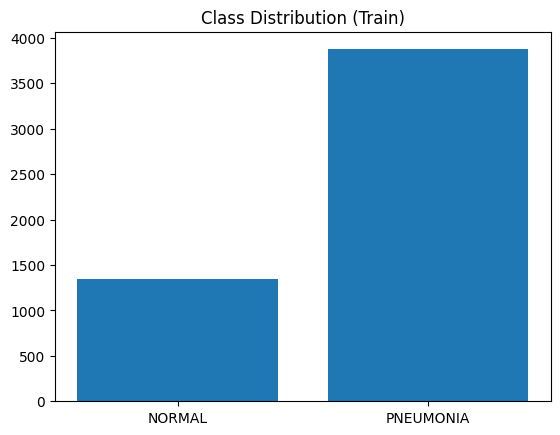

In [10]:
labels = list(class_indices.keys())
counts = [train_gen.labels.tolist().count(i) for i in range(len(labels))]
plt.bar(labels, counts)
plt.title("Class Distribution (Train)")
plt.show

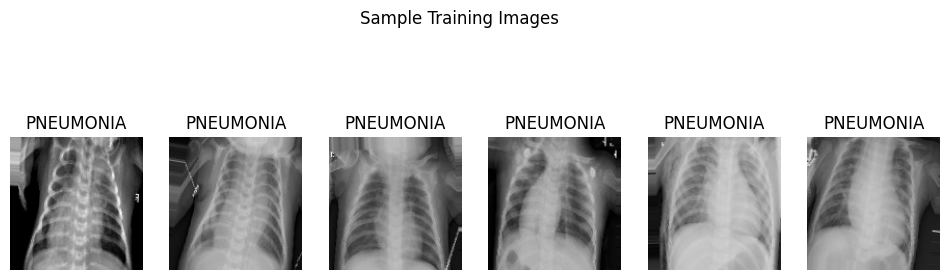

In [11]:
x, y = next(train_gen)
plt.figure(figsize=(12,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x[i])
    plt.title(labels[np.argmax(y[i])])
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.show()

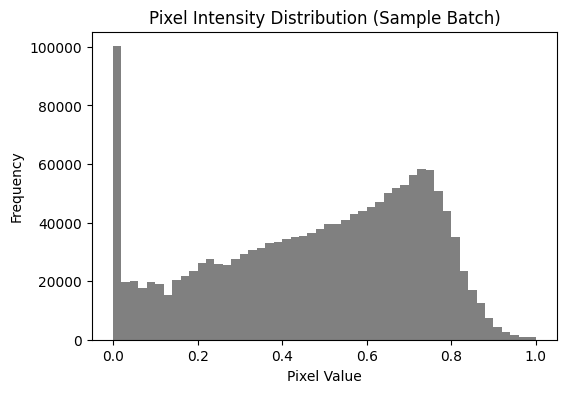

In [16]:
sample_imgs, _ = next(train_gen)  # Adjust as needed for your generator
all_pixels = sample_imgs.flatten()

plt.figure(figsize=(6,4))
plt.hist(all_pixels, bins=50, color='gray')
plt.title('Pixel Intensity Distribution (Sample Batch)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [12]:
input_shape = (128, 128, 3)
num_classes = len(class_indices)

model, history = train_model(train_gen, val_gen, input_shape, num_classes, class_weight=class_weight_dict)

/home/omar/ALU/ml-pipeline/plant_disease_classifier/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-02 00:02:17.844684: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/omar/ALU/ml-pipeline/plant_disease_classifier/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.7676 - auc: 0.8153 - loss: 2.3312 - precision: 0.7676 - recall: 0.7676
Epoch 1: val_loss improved from inf to 73.48064, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 623ms/step - accuracy: 0.7680 - auc: 0.8158 - loss: 2.3225 - precision: 0.7680 - recall: 0.7680 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 73.4806 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.8574 - auc: 0.9430 - loss: 0.3277 - precision: 0.8574 - recall: 0.8574
Epoch 2: val_loss did not improve from 73.48064
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 633ms/step - accuracy: 0.8574 - auc: 0.9430 - loss: 0.3276 - precision: 0.8574 - recall: 0.8574 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 75.6603 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.8945 - auc: 0.9599 - loss: 0.2910 - precision: 0.8945 - recall: 0.8945
Epoch 3: val_loss improved from 73.48064 to 2.86394, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 627ms/step - accuracy: 0.8945 - auc: 0.9599 - loss: 0.2909 - precision: 0.8945 - recall: 0.8945 - val_accuracy: 0.5000 - val_auc: 0.6250 - val_loss: 2.8639 - val_precision: 0.5000 - val_recall: 0.5000
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.9025 - auc: 0.9651 - loss: 0.2581 - precision: 0.9025 - recall: 0.9025
Epoch 4: val_loss improved from 2.86394 to 0.68404, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 662ms/step - accuracy: 0.9025 - auc: 0.9651 - loss: 0.2580 - precision: 0.9025 - recall: 0.9025 - val_accuracy: 0.6875 - val_auc: 0.8164 - val_loss: 0.6840 - val_precision: 0.6875 - val_recall: 0.6875
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.9011 - auc: 0.9681 - loss: 0.2513 - precision: 0.9011 - recall: 0.9011
Epoch 5: val_loss improved from 0.68404 to 0.26015, saving model to ../models/best_model.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 654ms/step - accuracy: 0.9011 - auc: 0.9680 - loss: 0.2513 - precision: 0.9011 - recall: 0.9011 - val_accuracy: 0.8750 - val_auc: 0.9844 - val_loss: 0.2602 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.8780 - auc: 0.9612 - loss: 0.2577 - precision: 0.8780 - recall: 0.8780
Epoch 6: val_loss did not improve from 0.26015
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 629ms/step - accuracy: 0.8781 - auc: 0.9613 - loss: 0.2575 - precision: 0.8781 - recall: 0.8781 - val_accuracy: 0.6250 - val_auc: 0.8516 - val_loss: 0.3969 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.9221 - auc: 0.9779 - loss: 0.1955 - precision: 0.9221 - recall: 0.9221
Epoch 7: val_loss did not improve from 0.26015
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 622ms/step - accuracy: 0.9221 - auc: 0.9779 - loss: 0.1956 - precision: 0.9221 - recall: 0.9221 - val_accuracy: 0.5000 - val

In [13]:
y_true = test_gen.classes
y_pred = model.predict(test_gen)
y_pred_labels = np.argmax(y_pred, axis=1)

/home/omar/ALU/ml-pipeline/plant_disease_classifier/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step


In [14]:
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=labels))

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.87      0.74      0.80       234
   PNEUMONIA       0.85      0.94      0.89       390

    accuracy                           0.86       624
   macro avg       0.86      0.84      0.85       624
weighted avg       0.86      0.86      0.86       624



In [15]:
with open('../models/history.json', 'w') as f:
    json.dump(history.history, f)